In [39]:
import os
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [40]:
STATE_LABELS = {
    "RLController_FDTask_pos": "RL+QP (FDTask)",
    "RLController_PureRL": "RL",
    "RLController_TorqueTask_pos": "RL+QP (TorqueTask)",
}

STATE_COLORS = {
    "RLController_FDTask_pos": "deepskyblue",
    "RLController_FDTask_torque": "royalblue",
    "RLController_PureRL": "darkgrey",
    "RLController_TorqueTask_pos": "coral",
    "RLController_TorqueTask_torque": "darkred",
}

In [ ]:
df_RL = pd.read_csv("RL-real.csv", sep=';')
df_RL.columns = [c.strip() for c in df_RL.columns]
df_FDTask = pd.read_csv("FDTask-real.csv", sep=';')
df_FDTask.columns = [c.strip() for c in df_FDTask.columns]
df_TorqueTask = pd.read_csv("TorqueTask-real.csv", sep=';')
df_TorqueTask.columns = [c.strip() for c in df_TorqueTask.columns]

In [42]:
df_RL.columns.tolist()
# Save column names to a text file
with open("csv_columns.txt", "w") as f:
    for col in df_RL.columns:
        f.write(f"{col}\n")

In [43]:
# Limits given to the QP
torque_limit_up = np.array([150.0, 150.0, 150.0, 150.0, 30.0, 150.0, 150.0, 150.0, 150.0, 30.0,
                150.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0])
torque_limit_low = np.array([-150.0, -150.0, -150.0, -150.0, -30.0, -150.0, -150.0, -150.0, -150.0, -30.0,
                -150.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

q_limit_up = np.array([0.48, 0.35, 2.58, 2.1,  0.57, 0.48, 0.35, 2.58, 2.1,  0.57, 0.35,
            1.05, 0.39, 1.35, 1.3,  1.05, 0.39, 1.35, 1.3])
q_limit_low = np.array([-0.48, -0.35, -2.58,  0.05, -0.92, -0.48, -0.35, -2.58,  0.05,
            -0.92, -0.35, -1.05, -0.39, -1.35, -1.3,  -1.05, -0.39, -1.35, -1.3])


q_limit_soft_up = np.array([df_RL[f"RLController_q_lim_upper_{i}"].to_numpy()[0].item() for i in range(19)])
q_limit_soft_low = np.array([df_RL[f"RLController_q_lim_lower_{i}"].to_numpy()[0].item() for i in range(19)])

qdot_limit_up = np.array([df_RL[f"RLController_qdot_limHard_upper_{i}"].to_numpy()[0].item() for i in range(19)])
qdot_limit_low = np.array([df_RL[f"RLController_qdot_limHard_lower_{i}"].to_numpy()[0].item() for i in range(19)])

qdot_limit_soft_up = np.array([df_RL[f"RLController_qdot_lim_upper_{i}"].to_numpy()[0].item() for i in range(19)])
qdot_limit_soft_low = np.array([df_RL[f"RLController_qdot_lim_lower_{i}"].to_numpy()[0].item() for i in range(19)])

# Soft limit
collision_columns_di = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_di")]
# Hard limit
collision_columns_ds = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_ds")]

collision_limit = np.array([df_RL[collision_columns_ds[i]].to_numpy()[0].item() for i in range(len(collision_columns_ds))])
collision_limit_soft = np.array([df_RL[collision_columns_di[i]].to_numpy()[0].item() for i in range(len(collision_columns_di))])

print("Torque limits up:", torque_limit_up)
print("Torque limits low:", torque_limit_low)
print("Position limits up:", q_limit_up)
print("Position limits low:", q_limit_low)
print("Soft position limits up:", q_limit_soft_up)
print("Soft position limits low:", q_limit_soft_low)
print("Velocity limits up:", qdot_limit_up)
print("Velocity limits low:", qdot_limit_low)
print("Soft velocity limits up:", qdot_limit_soft_up)
print("Soft velocity limits low:", qdot_limit_soft_low)
print("Collision limits (hard):", collision_limit)
print("Collision limits (soft):", collision_limit_soft)


Torque limits up: [150. 150. 150. 150.  30. 150. 150. 150. 150.  30. 150.  30.  30.  30.
  30.  30.  30.  30.  30.]
Torque limits low: [-150. -150. -150. -150.  -30. -150. -150. -150. -150.  -30. -150.  -30.
  -30.  -30.  -30.  -30.  -30.  -30.  -30.]
Position limits up: [0.48 0.35 2.58 2.1  0.57 0.48 0.35 2.58 2.1  0.57 0.35 1.05 0.39 1.35
 1.3  1.05 0.39 1.35 1.3 ]
Position limits low: [-0.48 -0.35 -2.58  0.05 -0.92 -0.48 -0.35 -2.58  0.05 -0.92 -0.35 -1.05
 -0.39 -1.35 -1.3  -1.05 -0.39 -1.35 -1.3 ]
Soft position limits up: [0.4704 0.343  2.5284 2.0795 0.5551 0.4704 0.343  2.5284 2.0795 0.5551
 0.343  1.029  0.3822 1.323  1.274  1.029  0.3822 1.323  1.274 ]
Soft position limits low: [-0.4704 -0.343  -2.5284  0.0705 -0.9051 -0.4704 -0.343  -2.5284  0.0705
 -0.9051 -0.343  -1.029  -0.3822 -1.323  -1.274  -1.029  -0.3822 -1.323
 -1.274 ]
Velocity limits up: [23 23 23 14  9 23 23 23 14  9 23  9  9 20 20  9  9 20 20]
Velocity limits low: [-23 -23 -23 -14  -9 -23 -23 -23 -14  -9 -23  -9  

In [44]:
torque_column_names = [f"tauOut_{i}" for i in range(19)]
q_column_names = [f"qIn_{i}" for i in range(19)]
qdot_column_names = [f"alphaIn_{i}" for i in range(19)]
joint_names = [
      "L Hip Yaw",        "L Hip Roll",      "L Hip Pitch", "L Knee",
      "L Ankle",          "R Hip Yaw",      "R Hip Roll", "R Hip Pitch",
      "R Knee",          "R Ankle",        "Torso",          "L Shoulder Pitch",
      "L Shoulder Roll",  "L Shoulder Yaw",  "L Elbow",     "R Shoulder Pitch",
      "R Shoulder Roll", "R Shoulder Yaw", "R Elbow"]

In [45]:
def icra_style():
    """Apply a compact ICRA-like style for paper figures."""
    rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'DejaVu Sans', 'Arial'],
        'pdf.fonttype': 42,  # ensure editable text in vector pdfs
        'ps.fonttype': 42,
        'font.size': 8,
        'axes.titlesize': 9,
        'axes.labelsize': 8,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        'axes.linewidth': 0.6,
    })

# Right Gains plots

In [46]:
# Get the min and max time value across all dataframes (last value of the 't' column)
min_time = min(df_RL['t'].iloc[-1], df_FDTask['t'].iloc[-1], df_TorqueTask['t'].iloc[-1])
print(f"Min time: {min_time}s")

min_time_Task = min(df_FDTask['t'].iloc[-1], df_TorqueTask['t'].iloc[-1])
print(f"Min time (Tasks only): {min_time_Task}s")

max_time = max(df_RL['t'].iloc[-1], df_FDTask['t'].iloc[-1], df_TorqueTask['t'].iloc[-1])
print(f"Max time: {max_time}s")

# Convert time to iteration by counting the number of rows in each dataframe
num_iterations_RL = df_RL.shape[0]
num_iterations_FDTask = df_FDTask.shape[0]
num_iterations_TorqueTask = df_TorqueTask.shape[0]
print(f"Number of iterations: RL = {num_iterations_RL}, FDTask = {num_iterations_FDTask}, TorqueTask = {num_iterations_TorqueTask}")

min_iterations = min(num_iterations_RL, num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Min iterations: {min_iterations}")
min_iterations_Task = min(num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Min iterations (Tasks only): {min_iterations_Task}")
max_iterations = max(num_iterations_RL, num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Max iterations: {max_iterations}")

freq = round(max_iterations / max_time)
print(f"Frequency: {freq} Hz")
dt = 1.0 / freq
print(f"Time step: {dt} s")



Min time: 62.765s
Min time (Tasks only): 62.765s
Max time: 96.035s
Number of iterations: RL = 38415, FDTask = 25852, TorqueTask = 25107
Min iterations: 25107
Min iterations (Tasks only): 25107
Max iterations: 38415
Frequency: 400 Hz
Time step: 0.0025 s


## $\tau_{err} = \tau_{cmd} - \tau_{RL}$ for TorqueTask and FDTask

<>:9: SyntaxWarning: invalid escape sequence '\|'
<>:9: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_30924/4147610193.py:9: SyntaxWarning: invalid escape sequence '\|'
  plt.ylabel("$\| \\tau_{cmd}-\\tau_{RL} \|$ [Nm]")


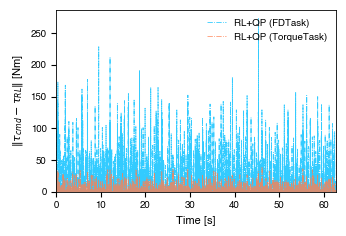

In [47]:
# Plot "tau_err" for FDTask and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.plot(df_FDTask['t'], df_FDTask['RLController_tau_err_norm'], label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.plot(df_TorqueTask['t'], df_TorqueTask['RLController_tau_err_norm'], label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.xlim(0, min_time_Task)
plt.ylim(bottom=0)
plt.xlabel("Time [s]")
plt.ylabel("$\| \\tau_{cmd}-\\tau_{RL} \|$ [Nm]")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("torque_error_comparison.pdf", dpi=300)
plt.show()

In [48]:
# Compute the mean and std of "tau_err" for FDTask and TorqueTask over the common time range
common_time_mask_FDTask = df_FDTask['t'] <= min_time_Task
common_time_mask_TorqueTask = df_TorqueTask['t'] <= min_time_Task
mean_tau_err_FDTask = df_FDTask.loc[common_time_mask_FDTask, 'RLController_tau_err_norm'].mean()
std_tau_err_FDTask = df_FDTask.loc[common_time_mask_FDTask, 'RLController_tau_err_norm'].std()
mean_tau_err_TorqueTask = df_TorqueTask.loc[common_time_mask_TorqueTask, 'RLController_tau_err_norm'].mean()
std_tau_err_TorqueTask = df_TorqueTask.loc[common_time_mask_TorqueTask, 'RLController_tau_err_norm'].std()
max_tau_err_FDTask = df_FDTask.loc[common_time_mask_FDTask, 'RLController_tau_err_norm'].max()
max_tau_err_TorqueTask = df_TorqueTask.loc[common_time_mask_TorqueTask, 'RLController_tau_err_norm'].max()
print(f"Max torque error FDTask: {max_tau_err_FDTask:.2f} Nm")
print(f"Max torque error TorqueTask: {max_tau_err_TorqueTask:.2f} Nm")
print(f"FDTask Torque Error: Mean = {mean_tau_err_FDTask:.2f} Nm, Std = {std_tau_err_FDTask:.2f} Nm")
print(f"TorqueTask Torque Error: Mean = {mean_tau_err_TorqueTask:.2f} Nm, Std = {std_tau_err_TorqueTask:.2f} Nm")

Max torque error FDTask: 273.12 Nm
Max torque error TorqueTask: 39.45 Nm
FDTask Torque Error: Mean = 12.39 Nm, Std = 24.48 Nm
TorqueTask Torque Error: Mean = 2.60 Nm, Std = 5.00 Nm


In [49]:
# Compute percentage of much the TorqueTask torque error is reduced compared to FDTask
reduction_percentage = (abs(mean_tau_err_TorqueTask - mean_tau_err_FDTask) / mean_tau_err_FDTask) * 100
print(f"TorqueTask torque error reduction compare to FDTask: {reduction_percentage:.2f}%")
reduction_percentage_std = (abs(std_tau_err_TorqueTask - std_tau_err_FDTask) / std_tau_err_FDTask) * 100
print(f"TorqueTask torque error std reduction compare to FDTask: {reduction_percentage_std:.2f}%")

TorqueTask torque error reduction compare to FDTask: 79.02%
TorqueTask torque error std reduction compare to FDTask: 79.57%


## $\ddot{q}_{err} = M^{-1}(\tau_{cmd} - \tau_{RL})$ for TorqueTask and FDTask

<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipykernel_30924/870225532.py:12: SyntaxWarning: invalid escape sequence '\|'
  plt.ylabel("$\| \\ddot{q}_{cmd}-\\ddot{q}_{RL} \|$ [rad/s²]")


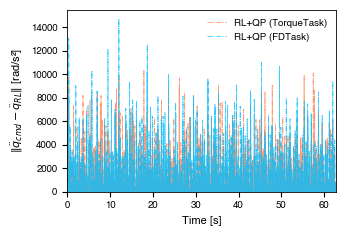

In [50]:
# Plot "forwardDynamic_err" for FDTask and TorqueTask
qddot_err_column = "RLController_qddot_err_norm"
qddot_err_norm_FDTask = df_FDTask[qddot_err_column].values
qddot_err_norm_TorqueTask = df_TorqueTask[qddot_err_column].values
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.plot(df_TorqueTask['t'], qddot_err_norm_TorqueTask, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.plot(df_FDTask['t'], qddot_err_norm_FDTask, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], linewidth=0.6, linestyle="-.", alpha=0.8)
plt.xlim(0, min_time_Task)
plt.ylim(bottom=0)
plt.xlabel("Time [s]")
plt.ylabel("$\| \\ddot{q}_{cmd}-\\ddot{q}_{RL} \|$ [rad/s²]")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("acceleration_error_comparison.pdf", dpi=300)
plt.show()

In [51]:
# Compute mean and std of position error for FDTask and TorqueTask over the common time range
mean_pos_err_FDTask = qddot_err_norm_FDTask[common_time_mask_FDTask].mean()
std_pos_err_FDTask = qddot_err_norm_FDTask[common_time_mask_FDTask].std()
mean_pos_err_TorqueTask = qddot_err_norm_TorqueTask[common_time_mask_TorqueTask].mean()
std_pos_err_TorqueTask = qddot_err_norm_TorqueTask[common_time_mask_TorqueTask].std()
max_pos_err_FDTask = qddot_err_norm_FDTask[common_time_mask_FDTask].max()
max_pos_err_TorqueTask = qddot_err_norm_TorqueTask[common_time_mask_TorqueTask].max()
print(f"Max acceleration error FDTask: {max_pos_err_FDTask:.4f} rad/s²")
print(f"Max acceleration error TorqueTask: {max_pos_err_TorqueTask:.4f} rad/s²")
print(f"FDTask Acceleration Error: Mean = {mean_pos_err_FDTask:.4f} rad, Std = {std_pos_err_FDTask:.4f} rad")
print(f"TorqueTask Acceleration Error: Mean = {mean_pos_err_TorqueTask:.4f} rad, Std = {std_pos_err_TorqueTask:.4f} rad")

Max acceleration error FDTask: 14717.7000 rad/s²
Max acceleration error TorqueTask: 10381.4000 rad/s²
FDTask Acceleration Error: Mean = 698.7083 rad, Std = 1414.4052 rad
TorqueTask Acceleration Error: Mean = 704.8907 rad, Std = 1353.8566 rad


In [52]:
# Compute percentage of how much the FDTask position error is reduced compared to TorqueTask
reduction_percentage_pos = (abs(mean_pos_err_TorqueTask - mean_pos_err_FDTask) / mean_pos_err_TorqueTask) * 100
print(f"FDTask acceleration error reduction compare to TorqueTask: {reduction_percentage_pos:.2f}%")
reduction_percentage_pos_std = (abs(std_pos_err_TorqueTask - std_pos_err_FDTask) / std_pos_err_TorqueTask) * 100
print(f"FDTask acceleration error std reduction compare to TorqueTask: {reduction_percentage_pos_std:.2f}%")

FDTask acceleration error reduction compare to TorqueTask: 0.88%
FDTask acceleration error std reduction compare to TorqueTask: 4.47%


## How many constraints were breached for RL, FDTask, TorqueTask

In [53]:
# Count how much self-collisions were detected under soft and hard limits for RL, FDTask, and TorqueTask
# Search for columns related to self-collisions distance, they start with "CollisionMonitor_" and end with "_distance", between is the names of the two colliding links separated by "::"

collision_columns_distance = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")]
# Soft limit
collision_columns_di = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_di")]
# Hard limit
collision_columns_ds = [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_ds")]

def count_self_collisions(df: pd.DataFrame, distance_cols: List[str], di_cols: List[str], ds_cols: List[str]) -> Tuple[int, int]:
    """Count the number of self-collisions detected under soft and hard limits."""
    soft_collisions = 0
    hard_collisions = 0
    for dist_col, di_col, ds_col in zip(distance_cols, di_cols, ds_cols):
        # Count soft collisions (distance < di)
        soft_collisions += (df[dist_col] < df[di_col]).sum()
        # Count soft collisions (distance < ds)
        hard_collisions += (df[dist_col] < df[ds_col]).sum()
    return soft_collisions, hard_collisions

hits_RL_soft_collision, hits_RL_hard_collision = count_self_collisions(df_RL, collision_columns_distance, collision_columns_di, collision_columns_ds)
hits_FDTask_soft_collision, hits_FDTask_hard_collision = count_self_collisions(df_FDTask, collision_columns_distance, collision_columns_di, collision_columns_ds)
hits_TorqueTask_soft_collision, hits_TorqueTask_hard_collision = count_self_collisions(df_TorqueTask, collision_columns_distance, collision_columns_di, collision_columns_ds)

hits_RL_soft_collision_percent = round(hits_RL_soft_collision / min_iterations * 100, 2)
hits_RL_hard_collision_percent = round(hits_RL_hard_collision / min_iterations * 100, 2)
hits_FDTask_soft_collision_percent = round(hits_FDTask_soft_collision / min_iterations * 100, 2)
hits_FDTask_hard_collision_percent = round(hits_FDTask_hard_collision / min_iterations * 100, 2)
hits_TorqueTask_soft_collision_percent = round(hits_TorqueTask_soft_collision / min_iterations * 100, 2)
hits_TorqueTask_hard_collision_percent = round(hits_TorqueTask_hard_collision / min_iterations * 100, 2)

print(f"Self-collisions detected (soft limit): RL = {hits_RL_soft_collision}, FDTask = {hits_FDTask_soft_collision}, TorqueTask = {hits_TorqueTask_soft_collision}")
print(f"Self-collisions detected (hard limit): RL = {hits_RL_hard_collision}, FDTask = {hits_FDTask_hard_collision}, TorqueTask = {hits_TorqueTask_hard_collision}")
print(f"Self-collisions detected percent of time (soft limit): RL = {hits_RL_soft_collision_percent}%, FDTask = {hits_FDTask_soft_collision_percent}%, TorqueTask = {hits_TorqueTask_soft_collision_percent}%")
print(f"Self-collisions detected percent of time (hard limit): RL = {hits_RL_hard_collision_percent}%, FDTask = {hits_FDTask_hard_collision_percent}%, TorqueTask = {hits_TorqueTask_hard_collision_percent}%")

Self-collisions detected (soft limit): RL = 0, FDTask = 0, TorqueTask = 0
Self-collisions detected (hard limit): RL = 0, FDTask = 0, TorqueTask = 0
Self-collisions detected percent of time (soft limit): RL = 0.0%, FDTask = 0.0%, TorqueTask = 0.0%
Self-collisions detected percent of time (hard limit): RL = 0.0%, FDTask = 0.0%, TorqueTask = 0.0%


In [54]:
def compute_limit_excess(df, limit_lower, limit_upper, input_columns):
    """
    Compute the absolute difference between input values and joint limits,
    returning a flat vector of all limit breaches (>0).
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing input signals (e.g., torques).
    limit_lower : list[str] or np.ndarray
        numpy array of constant lower limits (per joint).
    limit_upper : list[str] or np.ndarray
        numpy array of constant upper limits (per joint).
    input_columns : list[str]
        Column names in df for joint inputs (e.g., tauOut per joint).
    limitsInDf : bool, default False
        If True, limits are taken from df columns; otherwise, from arrays.
    
    Returns
    -------
    np.ndarray
        A 1D array containing all excess values (>0), flattened across
        joints and time.
    """
    
    excess_list = []
    
    for i, col in enumerate(input_columns):
        inputs = df[col].values
        lower_limits = np.full_like(inputs, limit_lower[i])
        upper_limits = np.full_like(inputs, limit_upper[i])

        # Compute excesses
        lower_excess = np.maximum(0, lower_limits - inputs)   # input < lower limit
        upper_excess = np.maximum(0, inputs - upper_limits)   # input > upper limit
        
        # Total excess (only positive values are breaches)
        joint_excess = lower_excess + upper_excess
        
        # Collect only breaches
        excess_list.append(joint_excess[joint_excess > 0])
    
    # Flatten everything into one row vector
    if excess_list:
        result = np.concatenate(excess_list)
    else:
        result = np.array([])
    
    return result


In [55]:
# Count how many times the limits are hit for all joints in RL, FDTask, and TorqueTask over the min_time range
def count_limit_hits(df: pd.DataFrame, limit_lower: np.ndarray, limit_upper: np.ndarray, input_columns: List[str]) -> int:
    """Count the number of times limits are hit across all joints"""
    hits = ((df[input_columns] < limit_lower) | (df[input_columns] > limit_upper)).sum().sum()
    return hits


In [56]:
df_FDTask_min = df_FDTask[df_FDTask['t'] <= min_time]
df_TorqueTask_min = df_TorqueTask[df_TorqueTask['t'] <= min_time]
hits_RL_torque = count_limit_hits(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
hits_FDTask_torque = count_limit_hits(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names)
hits_TorqueTask_torque = count_limit_hits(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)
hits_RL_torque_per_sec = round(hits_RL_torque / (min_iterations * dt), 2)
hits_FDTask_torque_per_sec = round(hits_FDTask_torque / (min_iterations * dt), 2)
hits_TorqueTask_torque_per_sec = round(hits_TorqueTask_torque / (min_iterations * dt), 2)
print(f"Torque limit hits: RL = {hits_RL_torque}, FDTask = {hits_FDTask_torque}, TorqueTask = {hits_TorqueTask_torque}")
print(f"Torque limit hits per second: RL = {hits_RL_torque_per_sec}, FDTask = {hits_FDTask_torque_per_sec}, TorqueTask = {hits_TorqueTask_torque_per_sec}")


Torque limit hits: RL = 563, FDTask = 0, TorqueTask = 0
Torque limit hits per second: RL = 8.97, FDTask = 0.0, TorqueTask = 0.0


In [57]:
hits_RL_q_hard = count_limit_hits(df_RL, q_limit_low, q_limit_up, q_column_names)
hits_FDTask_q_hard = count_limit_hits(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
hits_TorqueTask_q_hard = count_limit_hits(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
hits_RL_q_hard_per_sec = round(hits_RL_q_hard / (min_iterations * dt), 2)
hits_FDTask_q_hard_per_sec = round(hits_FDTask_q_hard / (min_iterations * dt), 2)
hits_TorqueTask_q_hard_per_sec = round(hits_TorqueTask_q_hard / (min_iterations * dt), 2)
print(f"Position hard limit hits: RL = {hits_RL_q_hard}, FDTask = {hits_FDTask_q_hard}, TorqueTask = {hits_TorqueTask_q_hard}")
print(f"Position hard limit hits per second: RL = {hits_RL_q_hard_per_sec}, FDTask = {hits_FDTask_q_hard_per_sec}, TorqueTask = {hits_TorqueTask_q_hard_per_sec}")

Position hard limit hits: RL = 1, FDTask = 0, TorqueTask = 0
Position hard limit hits per second: RL = 0.02, FDTask = 0.0, TorqueTask = 0.0


In [58]:
hits_RL_q_soft = count_limit_hits(df_RL, q_limit_soft_low, q_limit_soft_up, q_column_names)
hits_FDTask_q_soft = count_limit_hits(df_FDTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
hits_TorqueTask_q_soft = count_limit_hits(df_TorqueTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
hits_RL_q_soft_per_sec = round(hits_RL_q_soft / (min_iterations * dt), 2)
hits_FDTask_q_soft_per_sec = round(hits_FDTask_q_soft / (min_iterations * dt), 2)
hits_TorqueTask_q_soft_per_sec = round(hits_TorqueTask_q_soft / (min_iterations * dt), 2)
print(f"Position soft limit hits: RL = {hits_RL_q_soft}, FDTask = {hits_FDTask_q_soft}, TorqueTask = {hits_TorqueTask_q_soft}")
print(f"Position soft limit hits per second: RL = {hits_RL_q_soft_per_sec}, FDTask = {hits_FDTask_q_soft_per_sec}, TorqueTask = {hits_TorqueTask_q_soft_per_sec}")

Position soft limit hits: RL = 7, FDTask = 36, TorqueTask = 0
Position soft limit hits per second: RL = 0.11, FDTask = 0.57, TorqueTask = 0.0


In [59]:
hits_RL_qdot_hard = count_limit_hits(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
hits_FDTask_qdot_hard = count_limit_hits(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
hits_TorqueTask_qdot_hard = count_limit_hits(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
hits_RL_qdot_hard_per_sec = round(hits_RL_qdot_hard / (min_iterations * dt), 2)
hits_FDTask_qdot_hard_per_sec = round(hits_FDTask_qdot_hard / (min_iterations * dt), 2)
hits_TorqueTask_qdot_hard_per_sec = round(hits_TorqueTask_qdot_hard / (min_iterations * dt), 2)
print(f"Velocity hard limit hits: RL = {hits_RL_qdot_hard}, FDTask = {hits_FDTask_qdot_hard}, TorqueTask = {hits_TorqueTask_qdot_hard}")
print(f"Velocity hard limit hits per second: RL = {hits_RL_qdot_hard_per_sec}, FDTask = {hits_FDTask_qdot_hard_per_sec}, TorqueTask = {hits_TorqueTask_qdot_hard_per_sec}")


Velocity hard limit hits: RL = 66, FDTask = 83, TorqueTask = 50
Velocity hard limit hits per second: RL = 1.05, FDTask = 1.32, TorqueTask = 0.8


In [60]:
hits_RL_qdot_soft = count_limit_hits(df_RL, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
hits_FDTask_qdot_soft = count_limit_hits(df_FDTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
hits_TorqueTask_qdot_soft = count_limit_hits(df_TorqueTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
hits_RL_qdot_soft_per_sec = round(hits_RL_qdot_soft / (min_iterations * dt), 2)
hits_FDTask_qdot_soft_per_sec = round(hits_FDTask_qdot_soft / (min_iterations * dt), 2)
hits_TorqueTask_qdot_soft_per_sec = round(hits_TorqueTask_qdot_soft / (min_iterations * dt), 2)
print(f"Velocity soft limit hits: RL = {hits_RL_qdot_soft}, FDTask = {hits_FDTask_qdot_soft}, TorqueTask = {hits_TorqueTask_qdot_soft}")
print(f"Velocity soft limit hits per second: RL = {hits_RL_qdot_soft_per_sec}, FDTask = {hits_FDTask_qdot_soft_per_sec}, TorqueTask = {hits_TorqueTask_qdot_soft_per_sec}")

Velocity soft limit hits: RL = 271, FDTask = 332, TorqueTask = 211
Velocity soft limit hits per second: RL = 4.32, FDTask = 5.29, TorqueTask = 3.36


In [61]:
# Compute total hits in RL, FDTask, and TorqueTask by summing all types of hard limit hits
total_hits_RL_hard = hits_RL_torque + hits_RL_q_hard + hits_RL_qdot_hard
total_hits_FDTask_hard = hits_FDTask_torque + hits_FDTask_q_hard + hits_FDTask_qdot_hard
total_hits_TorqueTask_hard = hits_TorqueTask_torque + hits_TorqueTask_q_hard + hits_TorqueTask_qdot_hard
total_hits_RL_hard_per_sec = round(total_hits_RL_hard / (min_iterations * dt), 2)
total_hits_FDTask_hard_per_sec = round(total_hits_FDTask_hard / (min_iterations * dt), 2)
total_hits_TorqueTask_hard_per_sec = round(total_hits_TorqueTask_hard / (min_iterations * dt), 2)
print(f"Total hard limit hits: RL = {total_hits_RL_hard}, FDTask = {total_hits_FDTask_hard}, TorqueTask = {total_hits_TorqueTask_hard}")
print(f"Total hard limit hits per second: RL = {total_hits_RL_hard_per_sec}, FDTask = {total_hits_FDTask_hard_per_sec}, TorqueTask = {total_hits_TorqueTask_hard_per_sec}")


# Add the soft limit hits as well if needed
total_hits_RL_soft = total_hits_RL_hard + hits_RL_q_soft + hits_RL_qdot_soft
total_hits_FDTask_soft = total_hits_FDTask_hard + hits_FDTask_q_soft + hits_FDTask_qdot_soft
total_hits_TorqueTask_soft = total_hits_TorqueTask_hard + hits_TorqueTask_q_soft + hits_TorqueTask_qdot_soft
total_hits_RL_soft_per_sec = round(total_hits_RL_soft / (min_iterations * dt), 2)
total_hits_FDTask_soft_per_sec = round(total_hits_FDTask_soft / (min_iterations * dt), 2)
total_hits_TorqueTask_soft_per_sec = round(total_hits_TorqueTask_soft / (min_iterations * dt), 2)
print(f"Total soft limit hits: RL = {total_hits_RL_soft}, FDTask = {total_hits_FDTask_soft}, TorqueTask = {total_hits_TorqueTask_soft}")
print(f"Total soft limit hits per second: RL = {total_hits_RL_soft_per_sec}, FDTask = {total_hits_FDTask_soft_per_sec}, TorqueTask = {total_hits_TorqueTask_soft_per_sec}")

Total hard limit hits: RL = 630, FDTask = 83, TorqueTask = 50
Total hard limit hits per second: RL = 10.04, FDTask = 1.32, TorqueTask = 0.8
Total soft limit hits: RL = 908, FDTask = 451, TorqueTask = 261
Total soft limit hits per second: RL = 14.47, FDTask = 7.19, TorqueTask = 4.16


In [62]:
# Build an array to summarize all results in a table

# | Limits     | q soft | q hard | dot{q} soft | dot{q} hard | col_dist soft | col_dist hard | tau | Tot |
# | ---------- | -------- | -------- | -------------- | -------------- | ------------- | ------------- | ------ | --- |
# | RL         |          |          |                |                |               |               |        |     |
# | TorqueTask |          |          |                |                |               |               |        |     |
# | FDTask     |          |          |                |                |               |               |        |     |

results = {
    "Limits": ["q soft", "q hard", "dot{q} soft", "dot{q} hard", "col_dist soft", "col_dist hard", "tau", "Tot"],
    "RL": [hits_RL_q_soft, hits_RL_q_hard, hits_RL_qdot_soft, hits_RL_qdot_hard, hits_RL_soft_collision, hits_RL_hard_collision, hits_RL_torque, total_hits_RL_soft],
    "TorqueTask": [hits_TorqueTask_q_soft, hits_TorqueTask_q_hard, hits_TorqueTask_qdot_soft, hits_TorqueTask_qdot_hard, hits_TorqueTask_soft_collision, hits_TorqueTask_hard_collision, hits_TorqueTask_torque, total_hits_TorqueTask_soft],
    "FDTask": [hits_FDTask_q_soft, hits_FDTask_q_hard, hits_FDTask_qdot_soft, hits_FDTask_qdot_hard, hits_FDTask_soft_collision, hits_FDTask_hard_collision, hits_FDTask_torque, total_hits_FDTask_soft],
}
results_df = pd.DataFrame(results)
results_df.to_csv("limit_hits_summary.csv", index=False)

print(results_df)
print("\n")

# Same array but with per sec
results_per_sec = {
    "Limits": ["q soft", "q hard", "dot{q} soft", "dot{q} hard", "col_dist soft", "col_dist hard", "tau", "Tot"],
    "RL": [hits_RL_q_soft_per_sec, hits_RL_q_hard_per_sec, hits_RL_qdot_soft_per_sec, hits_RL_qdot_hard_per_sec, hits_RL_soft_collision_percent, hits_RL_hard_collision_percent, hits_RL_torque_per_sec, total_hits_RL_soft_per_sec],
    "TorqueTask": [hits_TorqueTask_q_soft_per_sec, hits_TorqueTask_q_hard_per_sec, hits_TorqueTask_qdot_soft_per_sec, hits_TorqueTask_qdot_hard_per_sec, hits_TorqueTask_soft_collision_percent, hits_TorqueTask_hard_collision_percent, hits_TorqueTask_torque_per_sec, total_hits_TorqueTask_soft_per_sec],
    "FDTask": [hits_FDTask_q_soft_per_sec, hits_FDTask_q_hard_per_sec, hits_FDTask_qdot_soft_per_sec, hits_FDTask_qdot_hard_per_sec, hits_FDTask_soft_collision_percent, hits_FDTask_hard_collision_percent, hits_FDTask_torque_per_sec, total_hits_FDTask_soft_per_sec],
}
results_per_sec_df = pd.DataFrame(results_per_sec)
results_per_sec_df.to_csv("limit_hits_summary_per_sec.csv", index=False)
print(results_per_sec_df)

          Limits   RL  TorqueTask  FDTask
0         q soft    7           0      36
1         q hard    1           0       0
2    dot{q} soft  271         211     332
3    dot{q} hard   66          50      83
4  col_dist soft    0           0       0
5  col_dist hard    0           0       0
6            tau  563           0       0
7            Tot  908         261     451


          Limits     RL  TorqueTask  FDTask
0         q soft   0.11        0.00    0.57
1         q hard   0.02        0.00    0.00
2    dot{q} soft   4.32        3.36    5.29
3    dot{q} hard   1.05        0.80    1.32
4  col_dist soft   0.00        0.00    0.00
5  col_dist hard   0.00        0.00    0.00
6            tau   8.97        0.00    0.00
7            Tot  14.47        4.16    7.19


In [63]:
# Summarize results without soft constraints
results_hard = {
    "Limits": ["q", "dot{q}", "col_dist", "tau", "Tot"],
    "RL": [hits_RL_q_hard, hits_RL_qdot_hard, hits_RL_hard_collision, hits_RL_torque, total_hits_RL_hard],
    "TorqueTask": [hits_TorqueTask_q_hard, hits_TorqueTask_qdot_hard, hits_TorqueTask_hard_collision, hits_TorqueTask_torque, total_hits_TorqueTask_hard],
    "FDTask": [hits_FDTask_q_hard, hits_FDTask_qdot_hard, hits_FDTask_hard_collision, hits_FDTask_torque, total_hits_FDTask_hard],
}
results_hard_df = pd.DataFrame(results_hard)
results_hard_df.to_csv("limit_hits_summary_hard_only.csv", index=False)
print(results_hard_df)
print("\n")

# Same array but with per sec
results_hard_per_sec = {
    "Limits": ["q", "dot{q}", "col_dist", "tau", "Tot"],
    "RL": [hits_RL_q_hard_per_sec, hits_RL_qdot_hard_per_sec, hits_RL_hard_collision_percent, hits_RL_torque_per_sec, total_hits_RL_hard_per_sec],
    "TorqueTask": [hits_TorqueTask_q_hard_per_sec, hits_TorqueTask_qdot_hard_per_sec, hits_TorqueTask_hard_collision_percent, hits_TorqueTask_torque_per_sec, total_hits_TorqueTask_hard_per_sec],
    "FDTask": [hits_FDTask_q_hard_per_sec, hits_FDTask_qdot_hard_per_sec, hits_FDTask_hard_collision_percent, hits_FDTask_torque_per_sec, total_hits_FDTask_hard_per_sec],
}
results_hard_per_sec_df = pd.DataFrame(results_hard_per_sec)
results_hard_per_sec_df.to_csv("limit_hits_summary_hard_only_per_sec.csv", index=False)
print(results_hard_per_sec_df)

     Limits   RL  TorqueTask  FDTask
0         q    1           0       0
1    dot{q}   66          50      83
2  col_dist    0           0       0
3       tau  563           0       0
4       Tot  630          50      83


     Limits     RL  TorqueTask  FDTask
0         q   0.02         0.0    0.00
1    dot{q}   1.05         0.8    1.32
2  col_dist   0.00         0.0    0.00
3       tau   8.97         0.0    0.00
4       Tot  10.04         0.8    1.32


In [64]:
# Compute the percentage of time spent beyond limits for all joints in RL, FDTask, and TorqueTask over the min_time range
def compute_percentage_time_beyond_limits(df: pd.DataFrame, limit_lower: np.ndarray, limit_upper: np.ndarray, input_columns: List[str]) -> float:
    """Compute the percentage of time spent beyond limits across all joints"""
    total_entries = df.shape[0] # * len(input_columns)
    beyond_limits = ((df[input_columns] < limit_lower) | (df[input_columns] > limit_upper)).sum().sum()
    percentage = (beyond_limits / total_entries) * 100
    return percentage

In [65]:
# Show the percentage of time spent beyond limits
percentage_RL_torque = compute_percentage_time_beyond_limits(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
percentage_FDTask_torque = compute_percentage_time_beyond_limits(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names) 
percentage_TorqueTask_torque = compute_percentage_time_beyond_limits(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)
print(f"Percentage of time beyond torque limits: RL = {percentage_RL_torque:.4f}%, FDTask = {percentage_FDTask_torque:.4f}%, TorqueTask = {percentage_TorqueTask_torque:.4f}%") 
percentage_RL_q_hard = compute_percentage_time_beyond_limits(df_RL, q_limit_low, q_limit_up, q_column_names)
percentage_FDTask_q_hard = compute_percentage_time_beyond_limits(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
percentage_TorqueTask_q_hard = compute_percentage_time_beyond_limits(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
print(f"Percentage of time beyond position hard limits: RL = {percentage_RL_q_hard:.4f}%, FDTask = {percentage_FDTask_q_hard:.4f}%, TorqueTask = {percentage_TorqueTask_q_hard:.4f}%") 
percentage_RL_q_soft = compute_percentage_time_beyond_limits(df_RL, q_limit_soft_low, q_limit_soft_up, q_column_names)
percentage_FDTask_q_soft = compute_percentage_time_beyond_limits(df_FDTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
percentage_TorqueTask_q_soft = compute_percentage_time_beyond_limits(df_TorqueTask_min, q_limit_soft_low, q_limit_soft_up, q_column_names)
print(f"Percentage of time beyond position soft limits: RL = {percentage_RL_q_soft:.4f}%, FDTask = {percentage_FDTask_q_soft:.4f}%, TorqueTask = {percentage_TorqueTask_q_soft:.4f}%") 
percentage_RL_qdot_hard = compute_percentage_time_beyond_limits(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
percentage_FDTask_qdot_hard = compute_percentage_time_beyond_limits(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
percentage_TorqueTask_qdot_hard = compute_percentage_time_beyond_limits(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
print(f"Percentage of time beyond velocity hard limits: RL = {percentage_RL_qdot_hard:.4f}%, FDTask = {percentage_FDTask_qdot_hard:.4f}%, TorqueTask = {percentage_TorqueTask_qdot_hard:.4f}%") 
percentage_RL_qdot_soft = compute_percentage_time_beyond_limits(df_RL, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
percentage_FDTask_qdot_soft = compute_percentage_time_beyond_limits(df_FDTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
percentage_TorqueTask_qdot_soft = compute_percentage_time_beyond_limits(df_TorqueTask_min, qdot_limit_soft_low, qdot_limit_soft_up, qdot_column_names)
print(f"Percentage of time beyond velocity soft limits: RL = {percentage_RL_qdot_soft:.4f}%, FDTask = {percentage_FDTask_qdot_soft:.4f}%, TorqueTask = {percentage_TorqueTask_qdot_soft:.4f}%")
percentage_RL_col_soft = compute_percentage_time_beyond_limits(df_RL, collision_limit_soft, np.inf, [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_FDTask_col_soft = compute_percentage_time_beyond_limits(df_FDTask_min, collision_limit_soft, np.inf, [col for col in df_FDTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_TorqueTask_col_soft = compute_percentage_time_beyond_limits(df_TorqueTask_min, collision_limit_soft, np.inf, [col for col in df_TorqueTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
print(f"Percentage of time beyond collision soft limits: RL = {percentage_RL_col_soft:.4f}%, FDTask = {percentage_FDTask_col_soft:.4f}%, TorqueTask = {percentage_TorqueTask_col_soft:.4f}%") 
percentage_RL_col_hard = compute_percentage_time_beyond_limits(df_RL, collision_limit, np.inf, [col for col in df_RL.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_FDTask_col_hard = compute_percentage_time_beyond_limits(df_FDTask_min, collision_limit, np.inf, [col for col in df_FDTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
percentage_TorqueTask_col_hard = compute_percentage_time_beyond_limits(df_TorqueTask_min, collision_limit, np.inf, [col for col in df_TorqueTask_min.columns if col.startswith("CollisionMonitor_") and col.endswith("_distance")])
print(f"Percentage of time beyond collision hard limits: RL = {percentage_RL_col_hard:.4f}%, FDTask = {percentage_FDTask_col_hard:.4f}%, TorqueTask = {percentage_TorqueTask_col_hard:.4f}%")   

Percentage of time beyond torque limits: RL = 1.4656%, FDTask = 0.0000%, TorqueTask = 0.0000%
Percentage of time beyond position hard limits: RL = 0.0026%, FDTask = 0.0000%, TorqueTask = 0.0000%
Percentage of time beyond position soft limits: RL = 0.0182%, FDTask = 0.1434%, TorqueTask = 0.0000%
Percentage of time beyond velocity hard limits: RL = 0.1718%, FDTask = 0.3306%, TorqueTask = 0.1991%
Percentage of time beyond velocity soft limits: RL = 0.7055%, FDTask = 1.3223%, TorqueTask = 0.8404%
Percentage of time beyond collision soft limits: RL = 0.0000%, FDTask = 0.0000%, TorqueTask = 0.0000%
Percentage of time beyond collision hard limits: RL = 0.0000%, FDTask = 0.0000%, TorqueTask = 0.0000%


In [66]:
# Show the percentage of time spent beyond limits in a table without soft constraints
results_percentage_hard = {
    "Limits": ["q", "dot{q}", "col_dist", "tau", "Tot"],
    "RL": [percentage_RL_q_hard, percentage_RL_qdot_hard, percentage_RL_col_hard, percentage_RL_torque, (percentage_RL_q_hard + percentage_RL_qdot_hard + percentage_RL_col_hard + percentage_RL_torque)],
    "TorqueTask": [percentage_TorqueTask_q_hard, percentage_TorqueTask_qdot_hard, percentage_TorqueTask_col_hard, percentage_TorqueTask_torque, (percentage_TorqueTask_q_hard + percentage_TorqueTask_qdot_hard + percentage_TorqueTask_col_hard + percentage_TorqueTask_torque)],
    "FDTask": [percentage_FDTask_q_hard, percentage_FDTask_qdot_hard, percentage_FDTask_col_hard, percentage_FDTask_torque, (percentage_FDTask_q_hard + percentage_FDTask_qdot_hard + percentage_FDTask_col_hard + percentage_FDTask_torque)],
}
results_percentage_hard_df = pd.DataFrame(results_percentage_hard)
results_percentage_hard_df.to_csv("percentage_time_beyond_limits_hard_only.csv", index=False)
print(results_percentage_hard_df)

     Limits        RL  TorqueTask    FDTask
0         q  0.002603    0.000000  0.000000
1    dot{q}  0.171808    0.199148  0.330585
2  col_dist  0.000000    0.000000  0.000000
3       tau  1.465573    0.000000  0.000000
4       Tot  1.639984    0.199148  0.330585


In [67]:
def compute_percentage_time_beyond_limits_per_joint(df: pd.DataFrame, limit_lower: np.ndarray, limit_upper: np.ndarray, input_columns: List[str]) -> List[float]:
    """Compute the percentage of time spent beyond limits per joint"""
    percentages = []
    total_entries = df.shape[0]
    for i, col in enumerate(input_columns):
        beyond_limits = ((df[col] < limit_lower[i]) | (df[col] > limit_upper[i])).sum()
        percentage = (beyond_limits / total_entries) * 100
        percentages.append(percentage)
    return percentages

In [68]:
# Show the percentage of time spent beyond limits per joint for torque in RL, FDTask, and TorqueTask
percentage_RL_torque_per_joint = compute_percentage_time_beyond_limits_per_joint(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
percentage_FDTask_torque_per_joint = compute_percentage_time_beyond_limits_per_joint(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names)
percentage_TorqueTask_torque_per_joint = compute_percentage_time_beyond_limits_per_joint(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)
results_percentage_torque_per_joint = {
    "Joint": torque_column_names,
    "RL": percentage_RL_torque_per_joint,
    "TorqueTask": percentage_TorqueTask_torque_per_joint,
    "FDTask": percentage_FDTask_torque_per_joint,
}
results_percentage_torque_per_joint_df = pd.DataFrame(results_percentage_torque_per_joint)
results_percentage_torque_per_joint_df.to_csv("percentage_time_beyond_torque_limits_per_joint.csv", index=False)
print(results_percentage_torque_per_joint_df)

        Joint        RL  TorqueTask  FDTask
0    tauOut_0  0.000000         0.0     0.0
1    tauOut_1  0.010413         0.0     0.0
2    tauOut_2  0.002603         0.0     0.0
3    tauOut_3  0.122348         0.0     0.0
4    tauOut_4  0.304569         0.0     0.0
5    tauOut_5  0.000000         0.0     0.0
6    tauOut_6  0.085904         0.0     0.0
7    tauOut_7  0.000000         0.0     0.0
8    tauOut_8  0.046857         0.0     0.0
9    tauOut_9  0.892880         0.0     0.0
10  tauOut_10  0.000000         0.0     0.0
11  tauOut_11  0.000000         0.0     0.0
12  tauOut_12  0.000000         0.0     0.0
13  tauOut_13  0.000000         0.0     0.0
14  tauOut_14  0.000000         0.0     0.0
15  tauOut_15  0.000000         0.0     0.0
16  tauOut_16  0.000000         0.0     0.0
17  tauOut_17  0.000000         0.0     0.0
18  tauOut_18  0.000000         0.0     0.0


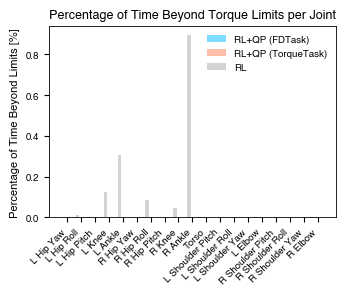

In [69]:
# Create a plot showing the percentage of time spent beyond torque limits per joint for RL, FDTask, and TorqueTask
# Use joint_names as x-axis labels, where joint_names(torque_column_names.index)
icra_style()
x = np.arange(len(torque_column_names))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(3.5, 3.0))
bars3 = ax.bar(x + width, percentage_FDTask_torque_per_joint, width, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], alpha=0.5)
bars2 = ax.bar(x, percentage_TorqueTask_torque_per_joint, width, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], alpha=0.5)
bars1 = ax.bar(x - width, percentage_RL_torque_per_joint, width, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], alpha=0.5)
ax.set_ylabel('Percentage of Time Beyond Limits [%]')
ax.set_title('Percentage of Time Beyond Torque Limits per Joint')
ax.set_xticks(x)
ax.set_xticklabels([joint_names[torque_column_names.index(col)] for col in torque_column_names], rotation=45, ha='right')
ax.legend(frameon=False)
# plt.yscale('log')
# plt.ylim(0.0, 100.0)
plt.tight_layout()
plt.savefig("percentage_time_beyond_torque_limits_per_joint.pdf", dpi=300)
plt.show()

In [70]:
# Show the percentage of time spent beyond limits per joint for q_hard in RL, FDTask, and TorqueTask
percentage_RL_q_hard_per_joint = compute_percentage_time_beyond_limits_per_joint(df_RL, q_limit_low, q_limit_up, q_column_names)
percentage_FDTask_q_hard_per_joint = compute_percentage_time_beyond_limits_per_joint(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
percentage_TorqueTask_q_hard_per_joint = compute_percentage_time_beyond_limits_per_joint(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
results_percentage_q_hard_per_joint = {
    "Joint": q_column_names,
    "RL": percentage_RL_q_hard_per_joint,
    "TorqueTask": percentage_TorqueTask_q_hard_per_joint,
    "FDTask": percentage_FDTask_q_hard_per_joint,
}
results_percentage_q_hard_per_joint_df = pd.DataFrame(results_percentage_q_hard_per_joint)
results_percentage_q_hard_per_joint_df.to_csv("percentage_time_beyond_position_hard_limits_per_joint.csv", index=False)
print(results_percentage_q_hard_per_joint_df)

     Joint        RL  TorqueTask  FDTask
0    qIn_0  0.000000         0.0     0.0
1    qIn_1  0.000000         0.0     0.0
2    qIn_2  0.000000         0.0     0.0
3    qIn_3  0.000000         0.0     0.0
4    qIn_4  0.000000         0.0     0.0
5    qIn_5  0.000000         0.0     0.0
6    qIn_6  0.000000         0.0     0.0
7    qIn_7  0.000000         0.0     0.0
8    qIn_8  0.002603         0.0     0.0
9    qIn_9  0.000000         0.0     0.0
10  qIn_10  0.000000         0.0     0.0
11  qIn_11  0.000000         0.0     0.0
12  qIn_12  0.000000         0.0     0.0
13  qIn_13  0.000000         0.0     0.0
14  qIn_14  0.000000         0.0     0.0
15  qIn_15  0.000000         0.0     0.0
16  qIn_16  0.000000         0.0     0.0
17  qIn_17  0.000000         0.0     0.0
18  qIn_18  0.000000         0.0     0.0


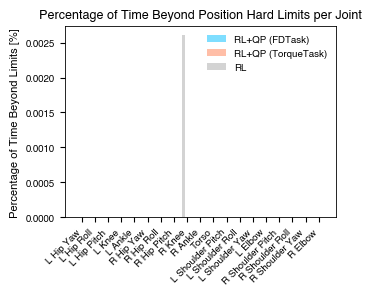

In [71]:
# Plot showing the percentage of time spent beyond position hard limits per joint for RL, FDTask, and TorqueTask
icra_style()
x = np.arange(len(q_column_names))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(3.5, 3.0))
bars3 = ax.bar(x + width, percentage_FDTask_q_hard_per_joint, width, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], alpha=0.5)
bars2 = ax.bar(x, percentage_TorqueTask_q_hard_per_joint, width, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], alpha=0.5)
bars1 = ax.bar(x - width, percentage_RL_q_hard_per_joint, width, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], alpha=0.5)
ax.set_ylabel('Percentage of Time Beyond Limits [%]')
ax.set_title('Percentage of Time Beyond Position Hard Limits per Joint')
ax.set_xticks(x)
ax.set_xticklabels([joint_names[q_column_names.index(col)] for col in q_column_names], rotation=45, ha='right')
ax.legend(frameon=False)
# plt.yscale('log')
# plt.ylim(0.0, 100.0)
plt.tight_layout()
plt.savefig("percentage_time_beyond_position_hard_limits_per_joint.pdf", dpi=300)
plt.show()

In [72]:
# Show the percentage of time spent beyond limits per joint for qdot_hard in RL, FDTask, and TorqueTask
percentage_RL_qdot_hard_per_joint = compute_percentage_time_beyond_limits_per_joint(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
percentage_FDTask_qdot_hard_per_joint = compute_percentage_time_beyond_limits_per_joint(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
percentage_TorqueTask_qdot_hard_per_joint = compute_percentage_time_beyond_limits_per_joint(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
results_percentage_qdot_hard_per_joint = {
    "Joint": qdot_column_names,
    "RL": percentage_RL_qdot_hard_per_joint,
    "TorqueTask": percentage_TorqueTask_qdot_hard_per_joint,
    "FDTask": percentage_FDTask_qdot_hard_per_joint,
}
results_percentage_qdot_hard_per_joint_df = pd.DataFrame(results_percentage_qdot_hard_per_joint)
results_percentage_qdot_hard_per_joint_df.to_csv("percentage_time_beyond_velocity_hard_limits_per_joint.csv", index=False)
print(results_percentage_qdot_hard_per_joint_df)

         Joint        RL  TorqueTask    FDTask
0    alphaIn_0  0.000000    0.000000  0.000000
1    alphaIn_1  0.000000    0.000000  0.000000
2    alphaIn_2  0.000000    0.000000  0.000000
3    alphaIn_3  0.000000    0.000000  0.000000
4    alphaIn_4  0.132761    0.159318  0.286773
5    alphaIn_5  0.000000    0.000000  0.000000
6    alphaIn_6  0.000000    0.000000  0.000000
7    alphaIn_7  0.000000    0.000000  0.000000
8    alphaIn_8  0.018222    0.007966  0.019915
9    alphaIn_9  0.020825    0.031864  0.023898
10  alphaIn_10  0.000000    0.000000  0.000000
11  alphaIn_11  0.000000    0.000000  0.000000
12  alphaIn_12  0.000000    0.000000  0.000000
13  alphaIn_13  0.000000    0.000000  0.000000
14  alphaIn_14  0.000000    0.000000  0.000000
15  alphaIn_15  0.000000    0.000000  0.000000
16  alphaIn_16  0.000000    0.000000  0.000000
17  alphaIn_17  0.000000    0.000000  0.000000
18  alphaIn_18  0.000000    0.000000  0.000000


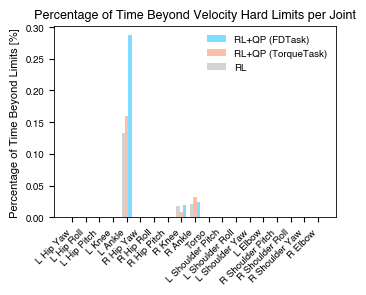

In [73]:
# Plot showing the percentage of time spent beyond velocity hard limits per joint for RL, FDTask, and TorqueTask
icra_style()
x = np.arange(len(qdot_column_names))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots(figsize=(3.5, 3.0))
bars3 = ax.bar(x + width, percentage_FDTask_qdot_hard_per_joint, width, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], alpha=0.5)
bars2 = ax.bar(x, percentage_TorqueTask_qdot_hard_per_joint, width, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], alpha=0.5)
bars1 = ax.bar(x - width, percentage_RL_qdot_hard_per_joint, width, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], alpha=0.5)
ax.set_ylabel('Percentage of Time Beyond Limits [%]')
ax.set_title('Percentage of Time Beyond Velocity Hard Limits per Joint')
ax.set_xticks(x)
ax.set_xticklabels([joint_names[qdot_column_names.index(col)] for col in qdot_column_names], rotation=45, ha='right')
ax.legend(frameon=False)
# plt.yscale('log')
# plt.ylim(0.0, 100.0)
plt.tight_layout()
plt.savefig("percentage_time_beyond_velocity_hard_limits_per_joint.pdf", dpi=300)
plt.show()

Torque excess samples: RL = 563, FDTask = 0, TorqueTask = 0


/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


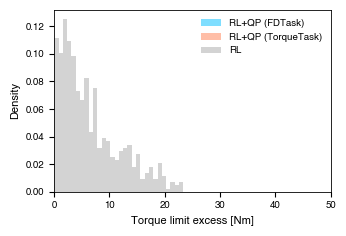

RL Torque Limit Excess: Mean = 6.52 Nm, Std = 5.40 Nm
FDTask Torque Limit Excess: Mean = nan Nm, Std = nan Nm
TorqueTask Torque Limit Excess: Mean = nan Nm, Std = nan Nm
RL Max Torque Limit Excess: 23.38 Nm
FDTask Max Torque Limit Excess: 0.00 Nm
TorqueTask Max Torque Limit Excess: 0.00 Nm


/tmp/ipykernel_30924/1902887540.py:25: RuntimeWarning: Mean of empty slice.
  mean_torque_excess_FDTask = torque_excess_FDTask.mean()
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/bastienm/Documents/ICRA2025_QP_RL/ExpH1/venv/lib/python3.12/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_30924/1

In [74]:
# Compute the torque excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range
torque_excess_RL = compute_limit_excess(df_RL, torque_limit_low, torque_limit_up, torque_column_names)
torque_excess_FDTask = compute_limit_excess(df_FDTask_min, torque_limit_low, torque_limit_up, torque_column_names)
torque_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, torque_limit_low, torque_limit_up, torque_column_names)


print(f"Torque excess samples: RL = {torque_excess_RL.size}, FDTask = {torque_excess_FDTask.size}, TorqueTask = {torque_excess_TorqueTask.size}")

# Show a plot with the histogram of the torque excess for RL, FDTask, and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(torque_excess_FDTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(torque_excess_TorqueTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(torque_excess_RL, bins=30, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Torque limit excess [Nm]")
plt.ylabel("Density")
plt.xlim(0, 50)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("torque_limit_excess_histogram.pdf", dpi=300)
plt.show()

mean_torque_excess_RL = torque_excess_RL.mean()
std_torque_excess_RL = torque_excess_RL.std()
mean_torque_excess_FDTask = torque_excess_FDTask.mean()
std_torque_excess_FDTask = torque_excess_FDTask.std()
mean_torque_excess_TorqueTask = torque_excess_TorqueTask.mean()
std_torque_excess_TorqueTask = torque_excess_TorqueTask.std()
max_torque_excess_RL = torque_excess_RL.max() if torque_excess_RL.size > 0 else 0
max_torque_excess_FDTask = torque_excess_FDTask.max() if torque_excess_FDTask.size > 0 else 0
max_torque_excess_TorqueTask = torque_excess_TorqueTask.max() if torque_excess_TorqueTask.size > 0 else 0
print(f"RL Torque Limit Excess: Mean = {mean_torque_excess_RL:.2f} Nm, Std = {std_torque_excess_RL:.2f} Nm")
print(f"FDTask Torque Limit Excess: Mean = {mean_torque_excess_FDTask:.2f} Nm, Std = {std_torque_excess_FDTask:.2f} Nm")
print(f"TorqueTask Torque Limit Excess: Mean = {mean_torque_excess_TorqueTask:.2f} Nm, Std = {std_torque_excess_TorqueTask:.2f} Nm")
print(f"RL Max Torque Limit Excess: {max_torque_excess_RL:.2f} Nm")
print(f"FDTask Max Torque Limit Excess: {max_torque_excess_FDTask:.2f} Nm")
print(f"TorqueTask Max Torque Limit Excess: {max_torque_excess_TorqueTask:.2f} Nm")


Position excess samples: RL = 1, FDTask = 0, TorqueTask = 0


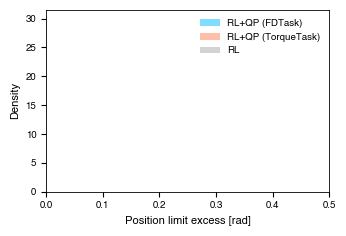

RL Position Limit Excess: Mean = 0.0023 rad, Std = 0.0000 rad
FDTask Position Limit Excess: Mean = nan rad, Std = nan rad
TorqueTask Position Limit Excess: Mean = nan rad, Std = nan rad
RL Max Position Limit Excess: 0.0023 rad
FDTask Max Position Limit Excess: 0.0000 rad
TorqueTask Max Position Limit Excess: 0.0000 rad


/tmp/ipykernel_30924/1488195410.py:23: RuntimeWarning: Mean of empty slice.
  mean_q_excess_FDTask = q_excess_FDTask.mean()
/tmp/ipykernel_30924/1488195410.py:25: RuntimeWarning: Mean of empty slice.
  mean_q_excess_TorqueTask = q_excess_TorqueTask.mean()


In [75]:
# Compute the position excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range
q_excess_RL = compute_limit_excess(df_RL, q_limit_low, q_limit_up, q_column_names)
q_excess_FDTask = compute_limit_excess(df_FDTask_min, q_limit_low, q_limit_up, q_column_names)
q_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, q_limit_low, q_limit_up, q_column_names)
print(f"Position excess samples: RL = {q_excess_RL.size}, FDTask = {q_excess_FDTask.size}, TorqueTask = {q_excess_TorqueTask.size}")

# Show a plot with the histogram of the position excess for RL, FDTask, and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(q_excess_FDTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(q_excess_TorqueTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(q_excess_RL, bins=30, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Position limit excess [rad]")
plt.ylabel("Density")
plt.xlim(0, 0.5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("position_limit_excess_histogram.pdf", dpi=300)
plt.show()

mean_q_excess_RL = q_excess_RL.mean()
std_q_excess_RL = q_excess_RL.std()
mean_q_excess_FDTask = q_excess_FDTask.mean()
std_q_excess_FDTask = q_excess_FDTask.std()
mean_q_excess_TorqueTask = q_excess_TorqueTask.mean()
std_q_excess_TorqueTask = q_excess_TorqueTask.std()
max_q_excess_RL = q_excess_RL.max() if q_excess_RL.size > 0 else 0
max_q_excess_FDTask = q_excess_FDTask.max() if q_excess_FDTask.size > 0 else 0
max_q_excess_TorqueTask = q_excess_TorqueTask.max() if q_excess_TorqueTask.size > 0 else 0
print(f"RL Position Limit Excess: Mean = {mean_q_excess_RL:.4f} rad, Std = {std_q_excess_RL:.4f} rad")
print(f"FDTask Position Limit Excess: Mean = {mean_q_excess_FDTask:.4f} rad, Std = {std_q_excess_FDTask:.4f} rad")
print(f"TorqueTask Position Limit Excess: Mean = {mean_q_excess_TorqueTask:.4f} rad, Std = {std_q_excess_TorqueTask:.4f} rad")
print(f"RL Max Position Limit Excess: {max_q_excess_RL:.4f} rad")
print(f"FDTask Max Position Limit Excess: {max_q_excess_FDTask:.4f} rad")
print(f"TorqueTask Max Position Limit Excess: {max_q_excess_TorqueTask:.4f} rad")


Velocity excess samples: RL = 66, FDTask = 83, TorqueTask = 50


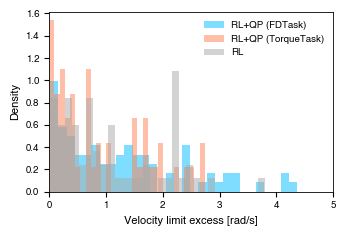

RL Velocity Limit Excess: Mean = 1.0976 rad/s, Std = 0.8853 rad/s
FDTask Velocity Limit Excess: Mean = 1.2965 rad/s, Std = 1.1003 rad/s
TorqueTask Velocity Limit Excess: Mean = 0.8993 rad/s, Std = 0.8106 rad/s
RL Max Velocity Limit Excess: 3.7955 rad/s
FDTask Max Velocity Limit Excess: 4.3683 rad/s
TorqueTask Max Velocity Limit Excess: 2.7397 rad/s


In [76]:
# Compute the velocity excess mean and std when the limits are hit for RL, FDTask, and TorqueTask over the min_time range
qdot_excess_RL = compute_limit_excess(df_RL, qdot_limit_low, qdot_limit_up, qdot_column_names)
qdot_excess_FDTask = compute_limit_excess(df_FDTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
qdot_excess_TorqueTask = compute_limit_excess(df_TorqueTask_min, qdot_limit_low, qdot_limit_up, qdot_column_names)
print(f"Velocity excess samples: RL = {qdot_excess_RL.size}, FDTask = {qdot_excess_FDTask.size}, TorqueTask = {qdot_excess_TorqueTask.size}")
# Show a plot with the histogram of the velocity excess for RL, FDTask, and TorqueTask
icra_style()
plt.figure(figsize=(3.5, 2.4))
plt.hist(qdot_excess_FDTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_FDTask_pos"], color=STATE_COLORS["RLController_FDTask_pos"], density=True)
plt.hist(qdot_excess_TorqueTask, bins=30, alpha=0.5, label=STATE_LABELS["RLController_TorqueTask_pos"], color=STATE_COLORS["RLController_TorqueTask_pos"], density=True)
plt.hist(qdot_excess_RL, bins=30, alpha=0.5, label=STATE_LABELS["RLController_PureRL"], color=STATE_COLORS["RLController_PureRL"], density=True)
plt.xlabel("Velocity limit excess [rad/s]")
plt.ylabel("Density")
plt.xlim(0, 5)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig("velocity_limit_excess_histogram.pdf", dpi=300)
plt.show()
mean_qdot_excess_RL = qdot_excess_RL.mean()
std_qdot_excess_RL = qdot_excess_RL.std()
mean_qdot_excess_FDTask = qdot_excess_FDTask.mean()
std_qdot_excess_FDTask = qdot_excess_FDTask.std()
mean_qdot_excess_TorqueTask = qdot_excess_TorqueTask.mean()
std_qdot_excess_TorqueTask = qdot_excess_TorqueTask.std()
max_qdot_excess_RL = qdot_excess_RL.max() if qdot_excess_RL.size > 0 else 0
max_qdot_excess_FDTask = qdot_excess_FDTask.max() if qdot_excess_FDTask.size > 0 else 0
max_qdot_excess_TorqueTask = qdot_excess_TorqueTask.max() if qdot_excess_TorqueTask.size > 0 else 0
print(f"RL Velocity Limit Excess: Mean = {mean_qdot_excess_RL:.4f} rad/s, Std = {std_qdot_excess_RL:.4f} rad/s")
print(f"FDTask Velocity Limit Excess: Mean = {mean_qdot_excess_FDTask:.4f} rad/s, Std = {std_qdot_excess_FDTask:.4f} rad/s")
print(f"TorqueTask Velocity Limit Excess: Mean = {mean_qdot_excess_TorqueTask:.4f} rad/s, Std = {std_qdot_excess_TorqueTask:.4f} rad/s")
print(f"RL Max Velocity Limit Excess: {max_qdot_excess_RL:.4f} rad/s")
print(f"FDTask Max Velocity Limit Excess: {max_qdot_excess_FDTask:.4f} rad/s")
print(f"TorqueTask Max Velocity Limit Excess: {max_qdot_excess_TorqueTask:.4f} rad/s")
